In [11]:
import os
import fiona
import numpy as np
import pprint
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import geopandas as gpd
import pandas as pd

In [12]:
path="." 
file="powiaty.gpkg"
powiaty=os.path.join(path,file)
powiatyDf = gpd.read_file(powiaty, layer='powiaty')
powiatyGds = gpd.read_file(powiaty, layer='GDOS:SpecjalneObszaryOchrony')

In [13]:
plik=fiona.open(powiaty)
print (plik.driver)
pprint.pprint(powiatyGds)

GPKG
       gid                            nazwa        kod  \
0    45177                      Dolina Tywy  PLH320050   
1    44682                  Dolina Krąpieli  PLH320005   
2    44863                Lasy Bierzwnickie  PLH320044   
3    45236   Dolina Płoni i Jezioro Miedwie  PLH320006   
4    45237                       Dolna Odra  PLH320037   
..     ...                              ...        ...   
171  44843              Ostoja Wielkopolska  PLH300010   
172  44847                    Góry Orlickie  PLH020060   
173  44941  Dolina Radwi, Chocieli i Chotli  PLH320022   
174  44862                   Ostoja Borecka  PLH280016   
175  44946                    Wolin i Uznam  PLH320019   

                        kodinspire  \
0    PL.ZIPOP.1393.N2K.PLH320050.H   
1    PL.ZIPOP.1393.N2K.PLH320005.H   
2    PL.ZIPOP.1393.N2K.PLH320044.H   
3    PL.ZIPOP.1393.N2K.PLH320006.H   
4    PL.ZIPOP.1393.N2K.PLH320037.H   
..                             ...   
171  PL.ZIPOP.1393.N2K.PLH300010

In [14]:
powiatyGdf = gpd.read_file(powiaty, layer='powiaty')
powiatyGdf.set_crs("EPSG:2180")
powiatyGdf.head()
area=gpd.GeoDataFrame(powiatyGdf.area/1000000)
powiatyGdf.insert(2, "Area [km2]", area)

In [15]:
pow_intersect = gpd.overlay(powiatyGdf, powiatyDf, how='intersection')
areaGdos=gpd.GeoDataFrame(pow_intersect.area/1000000)
powiatyGdf.insert(3, "GDOS [%]", areaGdos/area)
powiatyGdf.head()

,iip_przest,iip_identy,Area [km2],GDOS [%],iip_wersja,jpt_sjr_ko,jpt_kod_je,jpt_nazwa_,jpt_nazw01,jpt_organ_,...,id_bufora_,id_bufor01,id_technic,jpt_opis,jpt_sps_ko,gra_ids,status_obi,opis_bledu,typ_bledu,geometry
0,PL.PZGIK.200,f87cae01-4621-41f4-b768-c777cf94d1d8,785.532651,1.000000,2012-09-27T08:01:01+02:00,POW,1812,powiat niżański,None,None,...,NaN,13878.0,NaN,829081,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((711095.856 277431.597, 711101...."
1,PL.PZGIK.200,f322275e-1c48-431f-889e-8bb0ccb46e81,1211.565190,0.955074,2012-09-27T08:01:01+02:00,POW,1813,powiat przemyski,None,None,...,NaN,13878.0,NaN,829082,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((734488.435 209795.384, 734490...."
2,PL.PZGIK.200,59e7c5a7-8597-4c55-812a-b30932c08dd2,697.960193,1.191359,2012-09-27T08:01:01+02:00,POW,1814,powiat przeworski,None,None,...,NaN,13878.0,NaN,829083,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((731943.256 233158.050, 731989...."
3,PL.PZGIK.200,e86b1e71-8958-42ee-bec5-ca3c87907bc8,548.023258,3.068522,2012-09-27T08:01:01+02:00,POW,1815,powiat ropczycko-sędziszowski,None,None,...,NaN,13878.0,NaN,829084,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((676562.888 239118.997, 676567...."
4,PL.PZGIK.200,7f2af54d-150f-4b9f-b9fb-d2ce1b04166e,1157.134339,0.756458,2012-09-27T08:01:01+02:00,POW,1816,powiat rzeszowski,None,None,...,NaN,13878.0,NaN,829085,UZG,None,AKTUALNY,None,None,"MULTIPOLYGON (((696894.808 237348.347, 696909...."


In [16]:
csv = gpd.GeoDataFrame(powiatyGdf.geometry, crs='EPSG:2180')
csv.insert(0, 'id_powiatu', powiatyGdf.index)
csv.insert(1, 'nazwa_powiatu', powiatyGdf.jpt_nazwa_)
csv.insert(2, 'powierzchnia_powiatu', powiatyGdf.area)
csv.insert(3, 'procent_powierzchni__zajmowany_przez_natura_2000', areaGdos/area)
csv.head()

,id_powiatu,nazwa_powiatu,powierzchnia_powiatu,procent_powierzchni__zajmowany_przez_natura_2000,geometry
0,0,powiat niżański,7.855327e+08,1.000000,"MULTIPOLYGON (((711095.856 277431.597, 711101...."
1,1,powiat przemyski,1.211565e+09,0.955074,"MULTIPOLYGON (((734488.435 209795.384, 734490...."
2,2,powiat przeworski,6.979602e+08,1.191359,"MULTIPOLYGON (((731943.256 233158.050, 731989...."
3,3,powiat ropczycko-sędziszowski,5.480233e+08,3.068522,"MULTIPOLYGON (((676562.888 239118.997, 676567...."
4,4,powiat rzeszowski,1.157134e+09,0.756458,"MULTIPOLYGON (((696894.808 237348.347, 696909...."


In [17]:
csv.to_csv('lab5.csv') 

<AxesSubplot:>

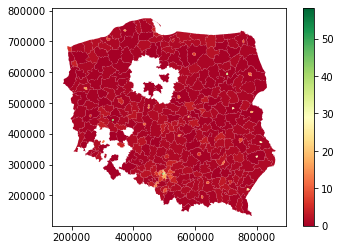

In [18]:
csv.plot(column='procent_powierzchni__zajmowany_przez_natura_2000', cmap='RdYlGn', legend=True)